In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/3월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.362903,0.346774,1.046512,0.145767,3.738145,2.844180,12.058386,9.174665
1,중랑구,(구)신한은행 중랑교지점,1,0.169355,0.241935,0.700000,0.026218,1.843936,1.162289,11.181150,7.047817
2,중랑구,(구)신한은행 중랑교지점,2,0.137097,0.145161,0.944444,0.101463,3.200975,2.352357,25.984796,19.095907
3,중랑구,(구)신한은행 중랑교지점,3,0.072581,0.064516,1.125000,0.182073,4.109260,3.189092,69.219470,53.719470
4,중랑구,(구)신한은행 중랑교지점,4,0.040323,0.145161,0.277778,0.000092,0.384332,0.106580,9.532307,2.643418
...,...,...,...,...,...,...,...,...,...,...,...
57739,강서구,힐스테이트에코,19,0.975806,1.612903,0.605000,0.007168,1.432840,0.832176,1.478965,0.858965
57740,강서구,힐스테이트에코,20,0.741935,0.895161,0.828829,0.046749,2.804854,2.014772,3.965853,2.848736
57741,강서구,힐스테이트에코,21,0.612903,0.733871,0.835165,0.048627,2.849280,2.054726,4.886437,3.523800
57742,강서구,힐스테이트에코,22,0.443548,0.500000,0.887097,0.065624,3.216570,2.387688,7.761228,5.761228


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.362903,0.346774,1.046512,3.738145,12.058386
1,중랑구,(구)신한은행 중랑교지점,1,0.169355,0.241935,0.700000,1.843936,11.181150
2,중랑구,(구)신한은행 중랑교지점,2,0.137097,0.145161,0.944444,3.200975,25.984796
3,중랑구,(구)신한은행 중랑교지점,3,0.072581,0.064516,1.125000,4.109260,69.219470
4,중랑구,(구)신한은행 중랑교지점,4,0.040323,0.145161,0.277778,0.384332,9.532307


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.170667,0.293136,0.222154,0.408435,0.319019,0.39625,0.295139,0.186938,0.397922,0.257118,0.329618,0.256543,0.401515,0.245664,0.183064,0.369427,0.296247,0.315938,0.419594,0.477085,0.202093,0.267097,0.236109,0.177371,0.254147


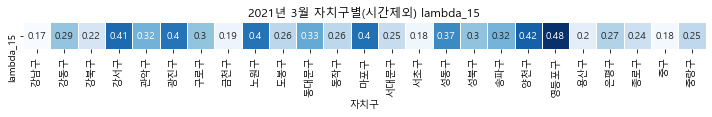

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.23296,0.394576,0.242006,0.578179,0.549326,0.747093,0.474143,0.331166,0.444319,0.304908,0.387417,0.372776,0.572149,0.303228,0.335928,0.579647,0.379954,0.441052,0.519984,0.796,0.308956,0.410908,0.291799,0.24191,0.314604


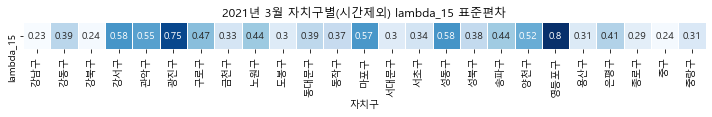

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.17986,0.284976,0.223107,0.405403,0.323195,0.391819,0.292104,0.188905,0.396383,0.253243,0.327041,0.253135,0.399903,0.25835,0.185585,0.368446,0.295659,0.313394,0.414515,0.478862,0.201977,0.259097,0.249032,0.187767,0.246476


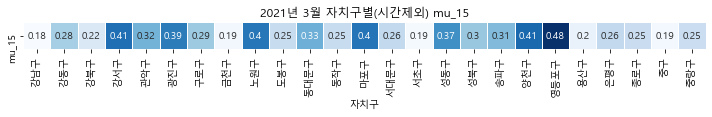

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.237206,0.362854,0.238488,0.551568,0.507046,0.656103,0.455378,0.316782,0.428492,0.277832,0.371173,0.315257,0.52267,0.278469,0.311527,0.555071,0.341727,0.438506,0.471098,0.77436,0.289285,0.343261,0.302981,0.248286,0.279036


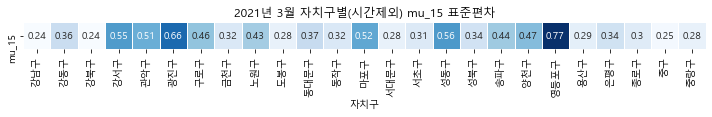

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.12065,1.1735,1.17532,1.26375,1.047751,1.065789,1.260408,1.364441,1.144659,1.165763,1.210787,1.120728,1.259968,1.181162,1.025691,1.161792,1.116418,1.160092,1.194501,1.255854,1.080322,1.169791,1.023914,1.041208,1.117727


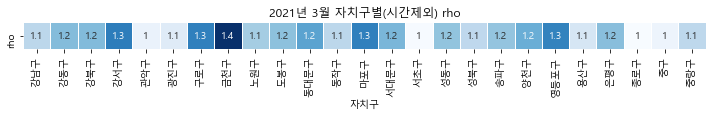

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.735033,1.498466,1.069774,2.208376,1.661316,2.243132,1.422754,0.712362,2.251699,1.382907,1.752379,1.332895,2.411007,1.212704,0.973186,2.037203,1.575917,1.704282,2.344781,2.892787,1.036825,1.415783,1.225001,0.795305,1.326426


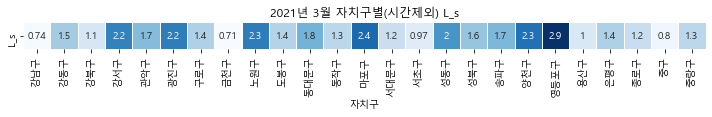

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.057123,1.991057,1.222197,2.750326,3.211535,5.386895,2.080812,1.201672,2.428979,1.766112,1.873776,2.052686,3.995753,1.530321,2.143016,3.137871,2.127808,2.3771,2.677245,5.083778,1.676762,2.449491,1.419331,1.115746,1.654118


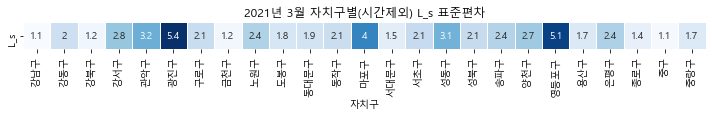

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,15.255695,18.999848,14.27371,27.220435,12.960893,18.451013,20.234258,16.309512,23.32839,19.370293,22.870656,16.521167,26.978755,18.022222,15.48973,24.234273,16.760947,24.160418,27.739965,31.290087,17.782292,16.368367,22.724119,14.531013,16.048999


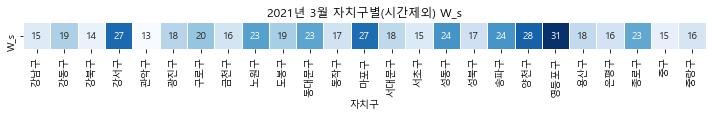

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,44.618422,56.62766,30.428169,99.496987,29.116347,58.479892,63.097693,55.22773,77.102083,58.932703,69.389831,63.398073,71.848989,45.184881,58.163967,76.660784,50.045528,98.982818,92.126807,101.157915,62.403541,51.061836,69.043246,48.820327,46.090617


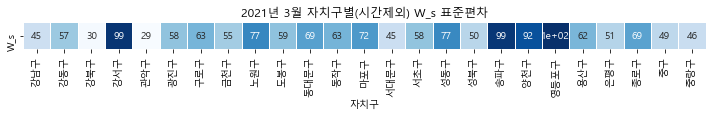

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.077032  0.064129  0.046194  0.030968  0.018903  0.018452  0.037161   
강동구  0.149326  0.103775  0.069036  0.035626  0.029156  0.043690  0.090393   
강북구  0.150582  0.115680  0.083686  0.057906  0.051428  0.042967  0.060947   
강서구  0.150554  0.097251  0.056547  0.038366  0.027963  0.046001  0.110326   
관악구  0.216014  0.147926  0.107949  0.059447  0.041590  0.050806  0.070392   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.121290  0.278645  0.197226  0.136000  0.151935  0.193419  0.198839   
강동구  0.193726  0.396934  0.237504  0.201879  0.236618  0.302021  0.320631   
강북구  0.122158  0.274458  0.148202  0.161026  0.187599  0.219461  0.237044   
강서구  0.347204  0.798626  0.405946  0.277438  0.333938  0.433814  0.465929   
관악구  0.170622  0.355645  0.226267  0.204263  0.244585  0.279378  0.319009   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.205742  0.225290  0.287419  0.363484  0.440387  0.313806  0.205548   
강동구  0.326037  0.382045  0.454626  0.562301  0.771801  0.606966  0.448511   
강북구  0.263485  0.296140  0.351269  0.401772  0.508726  0.404283  0.345981   
강서구  0.456433  0.522571  0.626503  0.817236  1.115862  0.811080  0.587994   
관악구  0.340323  0.390438  0.465323  0.590553  0.848733  0.698502  0.516244   

                                   
시간         21        22        23  
자치구                                
강남구  0.190129  0.188323  0.105677  
강동구  0.414038  0.419443  0.239188  
강북구  0.327869  0.313326  0.205711  
강서구  0.528297  0.490027  0.256538  
관악구  0.486866  0.508410  0.317166

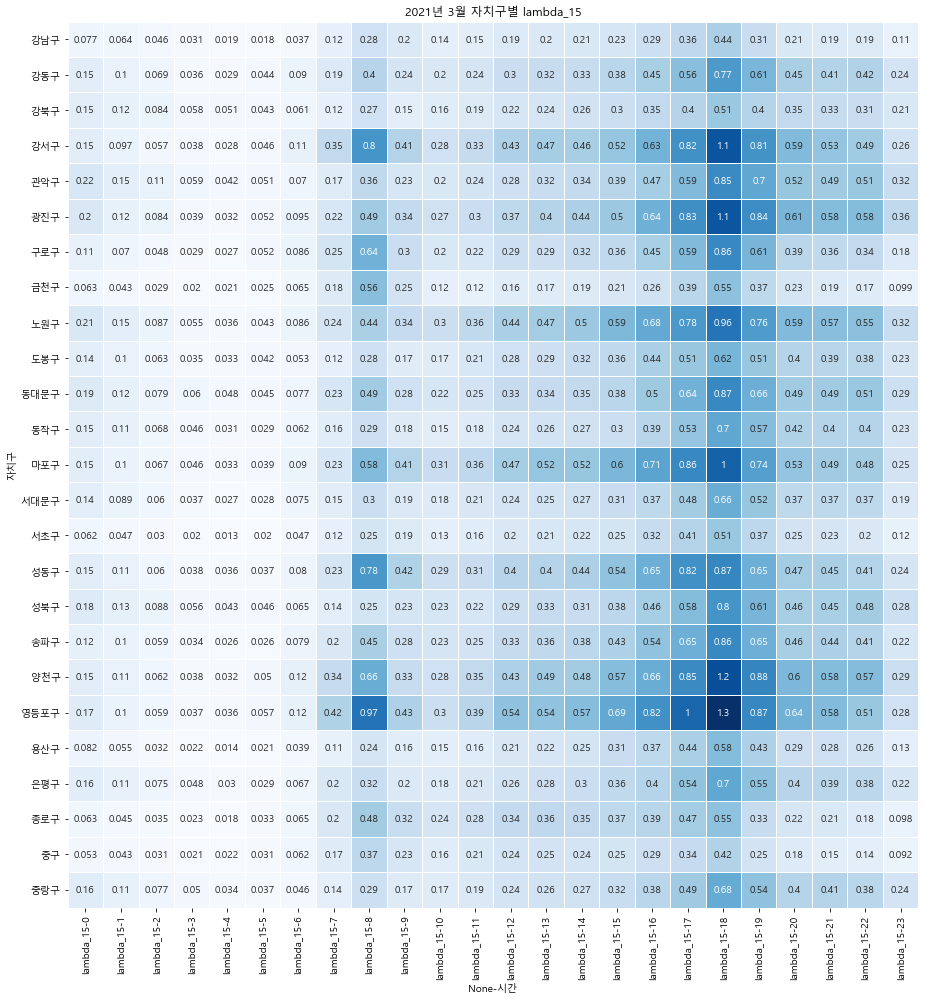

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.081676  0.064758  0.054392  0.039791  0.025298  0.033935  0.070237   
강동구  0.158522  0.119744  0.083802  0.045095  0.046042  0.083576  0.140185   
강북구  0.116287  0.095974  0.077382  0.066347  0.058138  0.059984  0.094008   
강서구  0.143165  0.093787  0.058704  0.045785  0.037898  0.068314  0.180651   
관악구  0.228610  0.158073  0.132750  0.090286  0.054621  0.096456  0.124874   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.159707  0.372919  0.247865  0.130698  0.145869  0.168008  0.171708   
강동구  0.270096  0.542560  0.302345  0.197230  0.217749  0.275834  0.296561   
강북구  0.178113  0.297292  0.156433  0.162188  0.165515  0.183870  0.209405   
강서구  0.578850  1.144475  0.531859  0.298993  0.342588  0.412010  0.429030   
관악구  0.280634  0.599623  0.288449  0.250411  0.288521  0.315099  0.412172   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.189959  0.214389  0.278627  0.376940  0.405912  0.296962  0.214491   
강동구  0.296821  0.357247  0.409970  0.524263  0.749630  0.581707  0.441962   
강북구  0.213569  0.241425  0.293104  0.311686  0.380457  0.295556  0.271930   
강서구  0.406128  0.455066  0.548226  0.784997  1.041978  0.703455  0.506972   
관악구  0.421428  0.523368  0.651865  0.800727  1.164286  0.935450  0.673948   

                                   
시간         21        22        23  
자치구                                
강남구  0.182759  0.174961  0.100245  
강동구  0.380635  0.393272  0.226880  
강북구  0.242338  0.211047  0.144425  
강서구  0.457472  0.417436  0.211380  
관악구  0.641781  0.672266  0.388423

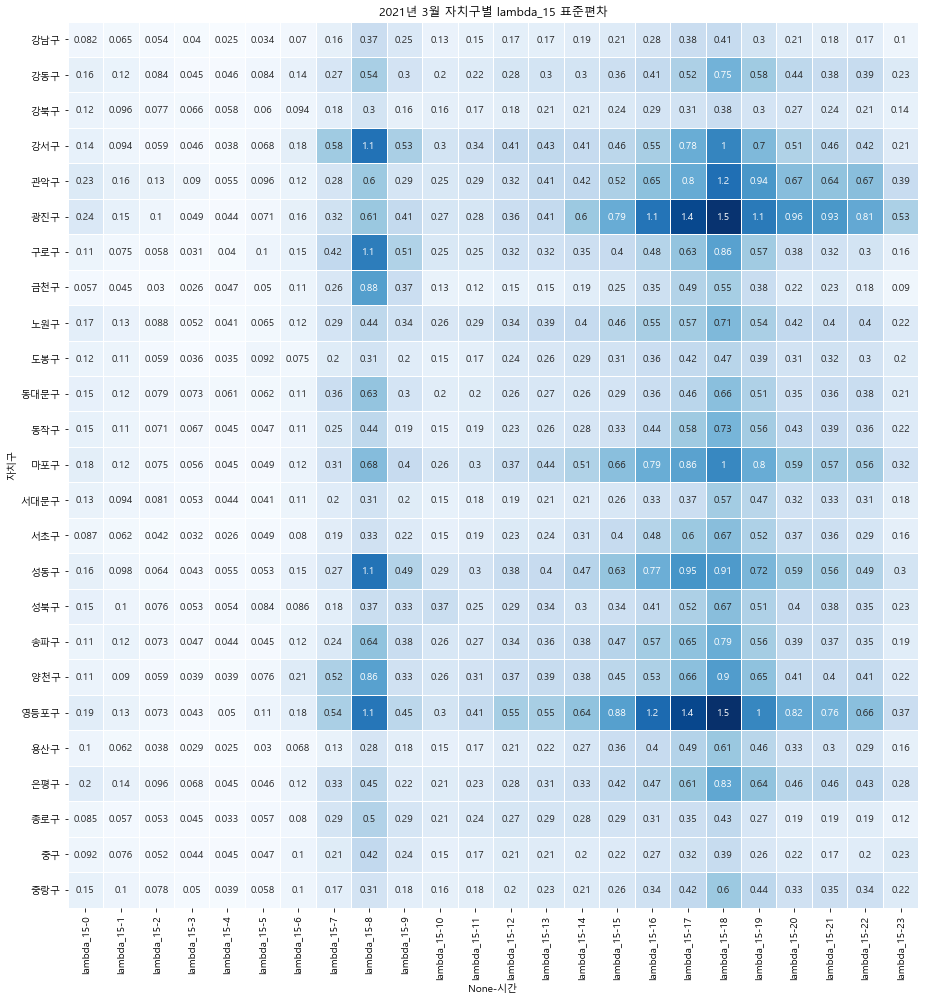

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.067806  0.053806  0.040516  0.027419  0.016387  0.018839  0.046516   
강동구  0.125665  0.083304  0.046083  0.031992  0.030220  0.056895  0.110510   
강북구  0.142253  0.091883  0.068218  0.045214  0.041512  0.042834  0.065442   
강서구  0.123735  0.079595  0.048339  0.033976  0.026914  0.052252  0.134711   
관악구  0.175922  0.129263  0.088479  0.055991  0.040323  0.070853  0.107488   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.119290  0.239032  0.158129  0.138129  0.175742  0.197355  0.208065   
강동구  0.278713  0.437611  0.273485  0.238479  0.268345  0.333836  0.340039   
강북구  0.156134  0.247753  0.173585  0.180724  0.201084  0.242861  0.283977   
강서구  0.423650  0.794522  0.385904  0.299532  0.393777  0.454142  0.488404   
관악구  0.280530  0.488364  0.285253  0.252304  0.279263  0.349194  0.370276   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.230000  0.264258  0.342516  0.476452  0.521032  0.296839  0.222581   
강동구  0.365916  0.415721  0.468628  0.552375  0.656593  0.454892  0.404644   
강북구  0.296933  0.330116  0.372951  0.406399  0.516261  0.361978  0.333686   
강서구  0.492604  0.564421  0.656566  0.874213  1.072485  0.687727  0.542422   
관악구  0.389171  0.450691  0.495507  0.554954  0.706797  0.545161  0.488249   

                                   
시간         21        22        23  
자치구                                
강남구  0.193871  0.178903  0.083161  
강동구  0.372917  0.321429  0.171127  
강북구  0.316235  0.269434  0.167107  
강서구  0.496612  0.405325  0.197843  
관악구  0.475576  0.437903  0.239171

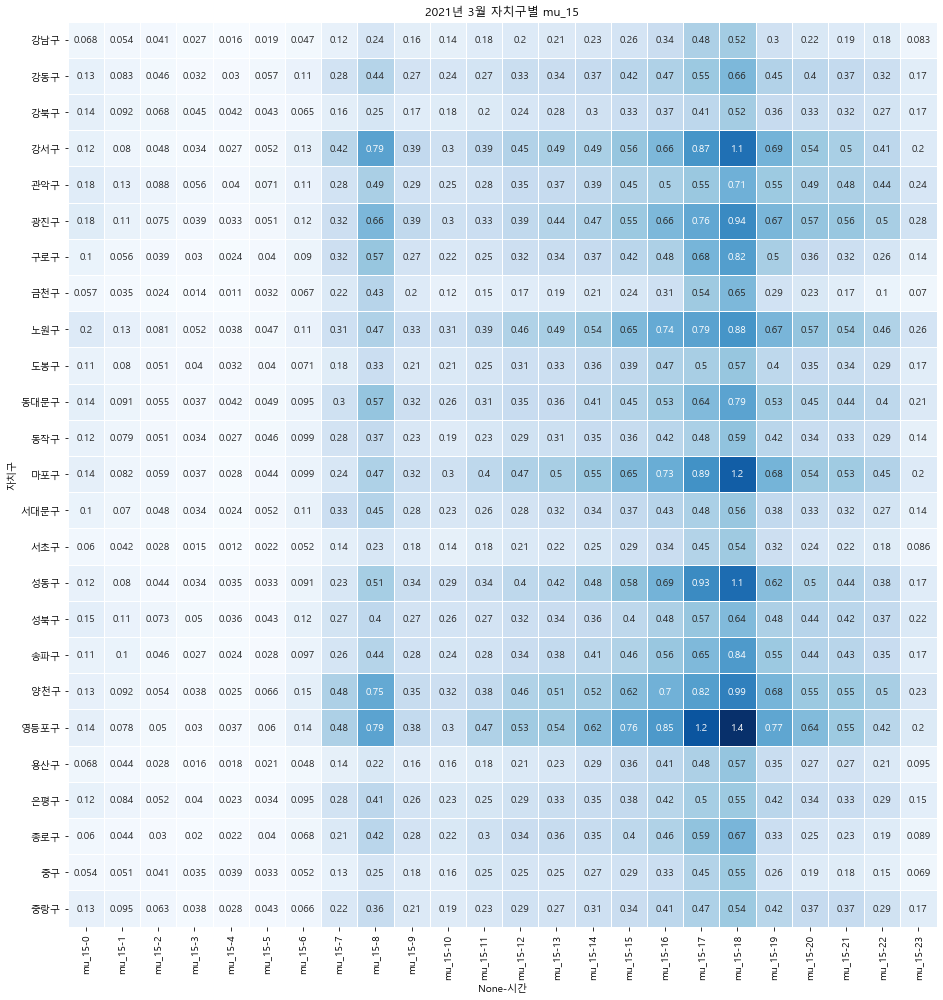

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.059826  0.046483  0.036405  0.030365  0.022484  0.035300  0.076863   
강동구  0.120633  0.088105  0.052240  0.040492  0.048006  0.089620  0.138473   
강북구  0.104901  0.073711  0.076302  0.053641  0.042695  0.060089  0.064669   
강서구  0.121931  0.085031  0.051349  0.042118  0.039389  0.069591  0.154746   
관악구  0.225657  0.174818  0.127548  0.094576  0.050764  0.098492  0.144234   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.140570  0.232928  0.143456  0.111237  0.136123  0.155841  0.172725   
강동구  0.278428  0.450562  0.259153  0.191963  0.236422  0.304455  0.306766   
강북구  0.118999  0.187767  0.118730  0.113242  0.137349  0.154761  0.200335   
강서구  0.456599  0.875944  0.355006  0.225263  0.323799  0.379753  0.417410   
관악구  0.372512  0.598148  0.359578  0.292619  0.312483  0.372905  0.398776   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.192665  0.229269  0.291632  0.431003  0.456428  0.264611  0.195811   
강동구  0.316209  0.367750  0.378014  0.528871  0.666018  0.474325  0.432431   
강북구  0.221852  0.256961  0.284147  0.302336  0.419341  0.305882  0.302834   
강서구  0.425447  0.463978  0.549768  0.841613  1.070179  0.708879  0.544997   
관악구  0.467449  0.556091  0.601999  0.693073  0.914858  0.740793  0.659522   

                                   
시간         21        22        23  
자치구                                
강남구  0.179282  0.170535  0.079065  
강동구  0.396507  0.326082  0.165657  
강북구  0.296522  0.210314  0.132882  
강서구  0.515871  0.415153  0.183265  
관악구  0.672738  0.678311  0.325891

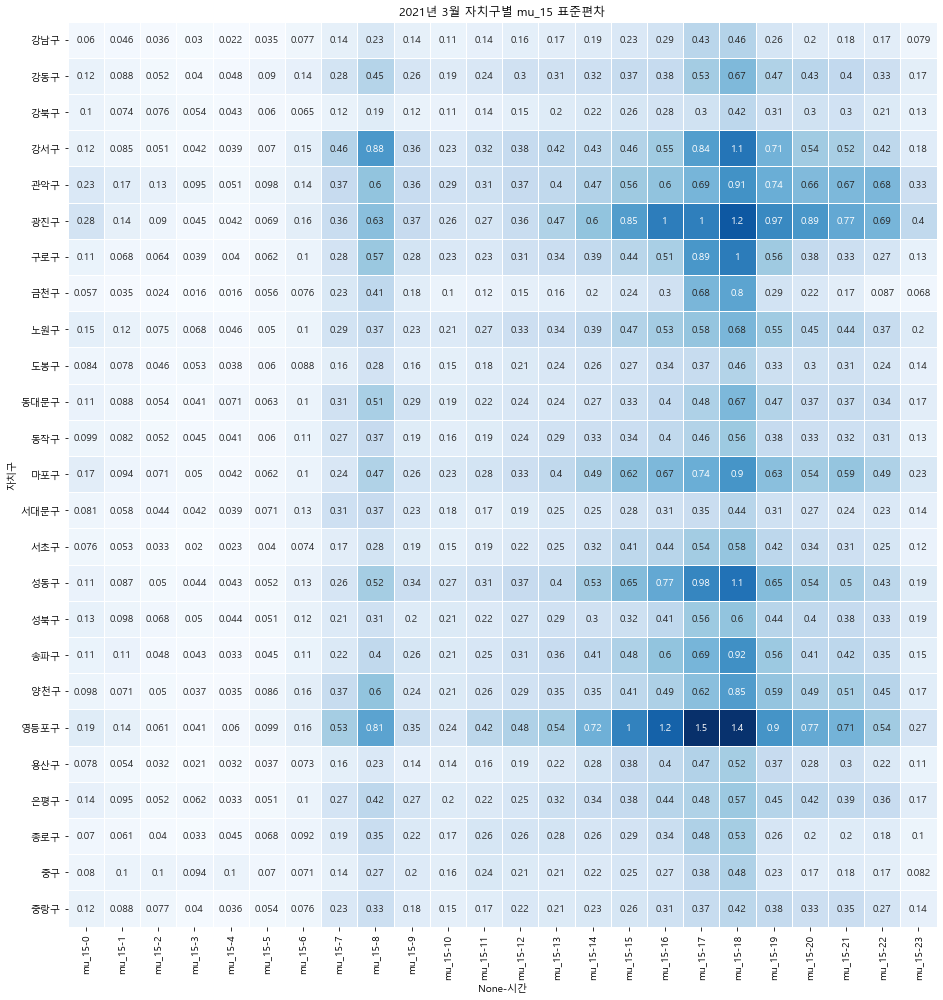

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.263702  1.451436  1.025019  1.163301  0.989511  0.799164  1.249128   
강동구  1.436683  1.570031  1.504180  1.086080  0.919727  1.029910  1.407700   
강북구  1.304612  1.336790  1.815790  2.027746  0.982554  1.501520  1.167671   
강서구  1.541636  1.444033  1.582352  1.108523  1.123311  1.443140  2.164331   
관악구  1.421634  1.351359  1.337407  0.985230  0.936090  0.893186  0.926360   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.829592  1.646488  1.424864  1.102689  0.844449  0.941474  0.923230   
강동구  1.175205  1.215917  0.893870  0.862886  0.938802  0.971169  0.937523   
강북구  0.838312  1.265248  1.006395  0.990681  0.854996  0.954648  0.793747   
강서구  1.533017  2.051910  1.269923  0.890693  0.762140  0.874195  0.917718   
관악구  0.884763  0.912950  1.122066  0.885499  1.062687  0.774404  0.792897   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.847846  0.850615  0.821547  0.831969  1.036733  1.098337  0.939767   
강동구  0.890540  0.907495  0.903237  1.076982  1.254228  1.460931  1.176042   
강북구  0.874069  0.878141  0.909786  0.972358  1.072274  1.234971  1.277205   
강서구  0.869561  0.863533  0.917029  0.930163  1.231088  1.268727  1.146862   
관악구  0.847812  0.791732  0.889193  0.988634  1.129143  1.306810  1.015553   

                                   
시간         21        22        23  
자치구                                
강남구  1.158997  1.220341  1.435399  
강동구  1.293229  1.684983  1.566661  
강북구  1.277327  1.380341  1.490491  
강서구  1.250654  1.523268  1.622191  
관악구  1.197225  1.393430  1.299964

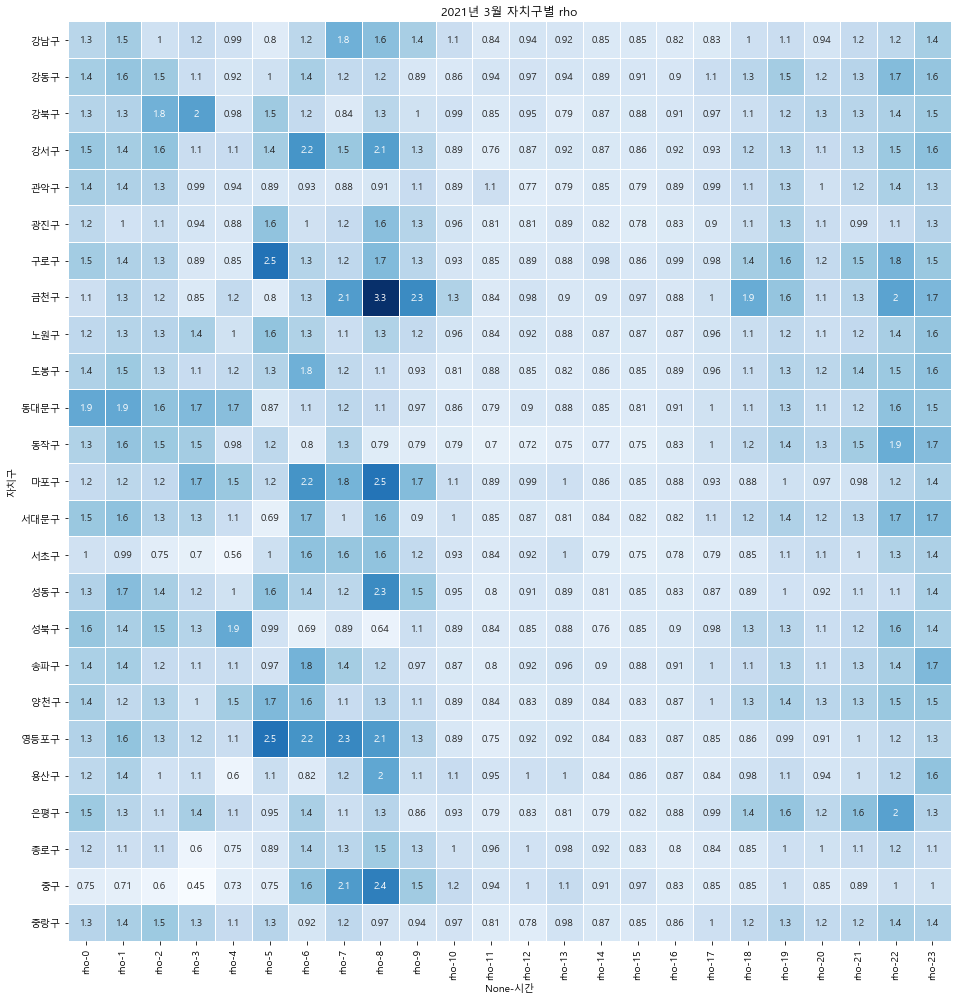

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.841374  0.837222  0.679370  0.735638  0.676790  0.426157  0.562226   
강동구  1.847697  1.810530  1.816494  1.517155  1.127509  1.037192  1.157056   
강북구  1.107570  1.195230  1.138525  1.082429  1.000251  0.909109  1.009546   
강서구  2.422122  2.441190  2.285403  1.821816  1.703639  2.019215  2.017802   
관악구  1.940691  2.008845  1.827849  1.716630  1.634432  1.611847  1.288900   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.787797  0.809125  0.829331  0.735889  0.738749  0.781558  0.729168   
강동구  1.210894  1.195484  1.240433  1.312447  1.323497  1.381764  1.414407   
강북구  0.909677  1.205162  1.079905  1.003481  1.105862  1.038883  0.954227   
강서구  1.973768  1.877268  2.062491  2.104352  1.898427  2.213997  2.161698   
관악구  1.114155  1.291267  1.134589  1.208002  1.459445  1.121785  1.633520   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.705913  0.690595  0.710912  0.688969  0.694304  0.810779  0.734566   
강동구  1.317876  1.384613  1.508004  1.637807  1.769406  1.928368  1.654943   
강북구  0.990878  1.012435  1.057724  1.093540  1.057346  1.183241  1.103021   
강서구  2.126030  2.142853  2.271471  2.488383  2.525378  2.645263  2.424148   
관악구  1.337932  1.416814  1.799865  2.112647  2.184895  2.332099  1.849953   

                                   
시간         21        22        23  
자치구                                
강남구  0.751461  0.763240  0.919652  
강동구  1.619075  1.781779  1.968759  
강북구  1.081761  1.144109  1.210654  
강서구  2.364010  2.436415  2.573893  
관악구  1.692921  1.813836  2.338669

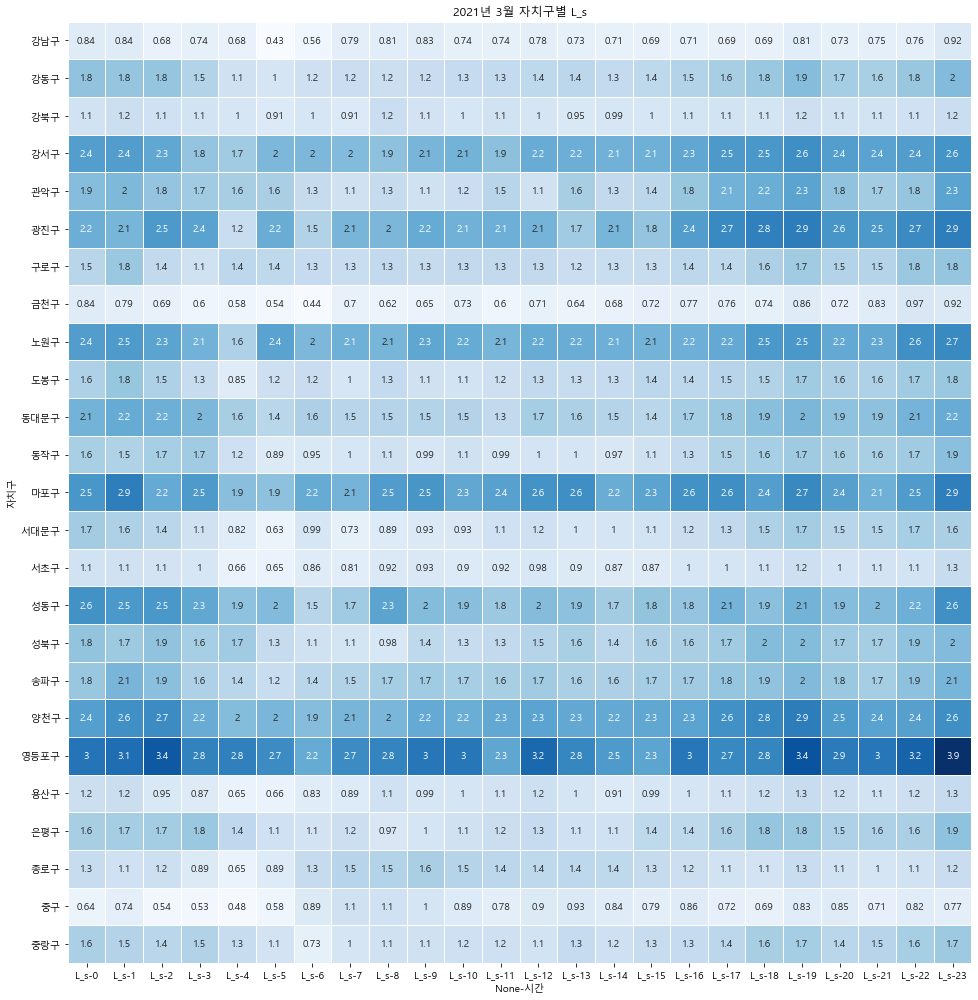

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.182448  1.303420  0.894826  1.234432  1.256715  0.922465  1.306315   
강동구  2.505322  2.323038  2.338117  2.299164  1.991205  1.919586  2.168171   
강북구  1.177402  1.190776  1.078729  1.097226  1.489436  1.487438  1.653486   
강서구  2.785312  2.835052  2.767372  2.763025  3.022507  3.666298  3.685689   
관악구  3.221933  3.614500  3.086060  3.424431  3.380988  4.668834  3.118304   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.377216  1.310215  1.229738  0.841508  1.033175  1.020943  0.784411   
강동구  2.165825  1.794930  1.784986  1.802680  1.594478  1.578123  1.556553   
강북구  1.446097  1.660418  1.554715  1.287976  1.320997  1.202003  1.060699   
강서구  3.229925  2.609184  2.861474  2.994585  2.405097  2.473653  2.238467   
관악구  2.702202  2.820823  1.771974  1.879633  3.089877  1.500754  3.823522   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.814459  0.874546  0.848574  1.068598  0.778101  0.968653  0.994224   
강동구  1.454185  1.516088  1.712091  2.010170  2.053148  2.210526  1.949661   
강북구  0.960681  0.957927  1.084936  1.063516  0.943212  1.100960  0.979829   
강서구  2.037396  2.170513  2.327100  2.868685  2.715275  2.643904  2.388459   
관악구  1.913769  2.202123  3.658339  4.115083  4.304401  4.320477  2.860393   

                                   
시간         21        22        23  
자치구                                
강남구  0.851212  0.868839  1.177174  
강동구  1.869918  2.182384  2.286850  
강북구  1.002804  1.050615  1.163662  
강서구  2.488037  2.514145  2.721337  
관악구  2.461067  2.516131  3.883246

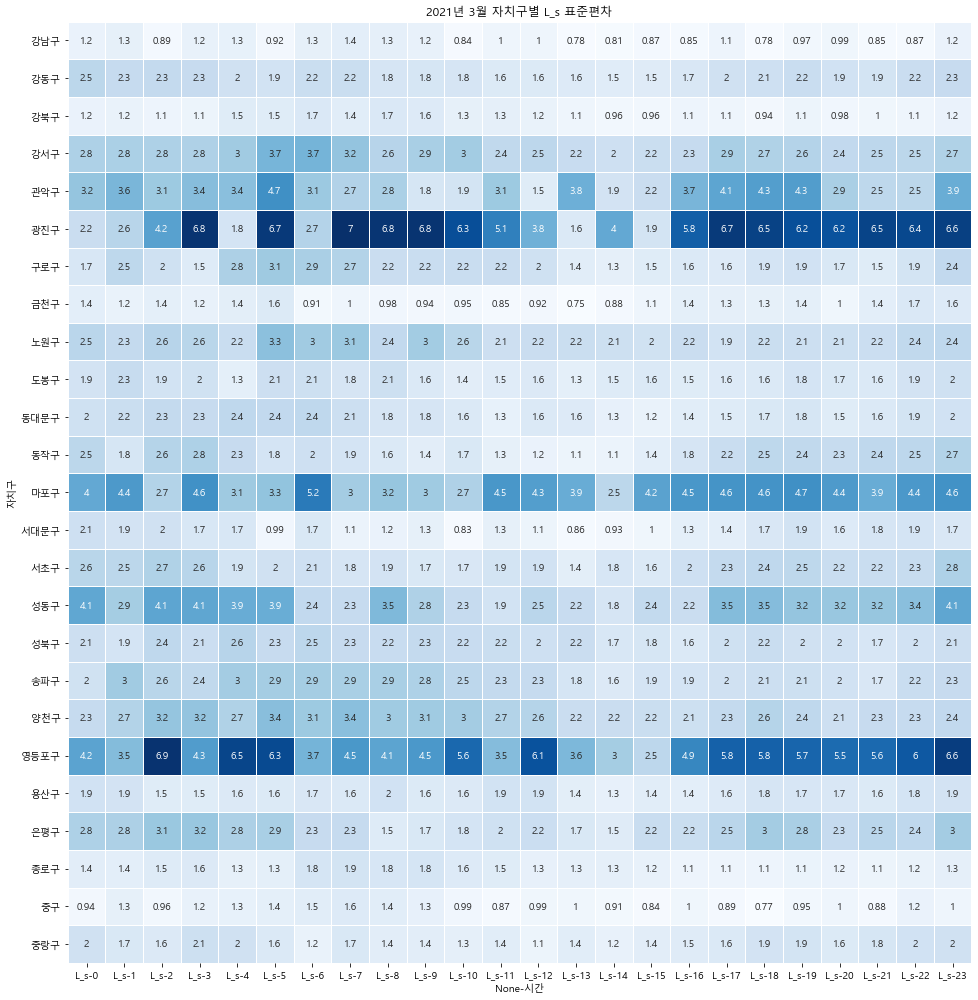

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                          \
시간          0          1          2          3           4          5    
자치구                                                                      
강남구  20.499164  29.967185  28.139700  48.734876   57.201981  34.248086   
강동구  22.437892  37.647795  56.095882  76.769444   70.064325  52.125943   
강북구  14.217740  18.261262  35.696979  53.038385   36.483816  47.412072   
강서구  33.307849  47.313921  93.331932  82.902824  128.372816  99.275230   
관악구  12.984757  17.483394  29.170975  41.154766   52.732829  37.351534   

                                                                              \
시간          6          7         8          9         10        11        12   
자치구                                                                            
강남구  38.987830  15.933724  6.522028   8.239185  7.926868  6.429714  5.466474   
강동구  30.191675  10.438780  5.181172   7.497172  7.903217  6.990684  5.922867   
강북구  30.339249  10.054545  8.038835  10.242177  7.806938  7.721524  5.750857   
강서구  54.128382  11.340212  5.461933   7.840142  8.020711  6.018749  5.484900   
관악구  28.111774   9.834851  5.073001   8.110466  7.838326  6.234523  4.479071   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  4.808263  4.242118  3.808750  2.903207  2.308996  2.156064  3.657960   
강동구  5.765699  4.792728  4.423156  3.880824  3.881591  3.566150  5.145094   
강북구  5.170950  4.798589  4.509923  3.981956  3.694805  2.919900  4.476147   
강서구  5.064783  5.171248  4.484420  3.962390  3.362241  3.392464  4.771224   
관악구  4.658675  4.699878  3.970582  4.093866  3.569744  2.917068  3.983724   

                                              
시간         20        21        22         23  
자치구                                           
강남구  4.727396  5.889808  6.679406  16.657886  
강동구  5.467223  6.312507  7.718260  15.776275  
강북구  5.788465  5.610040  5.969763  10.584133  
강서구  5.899267  7.529795  9.221735  17.631275  
관악구  4.052982  4.343016  5.080926   9.130710

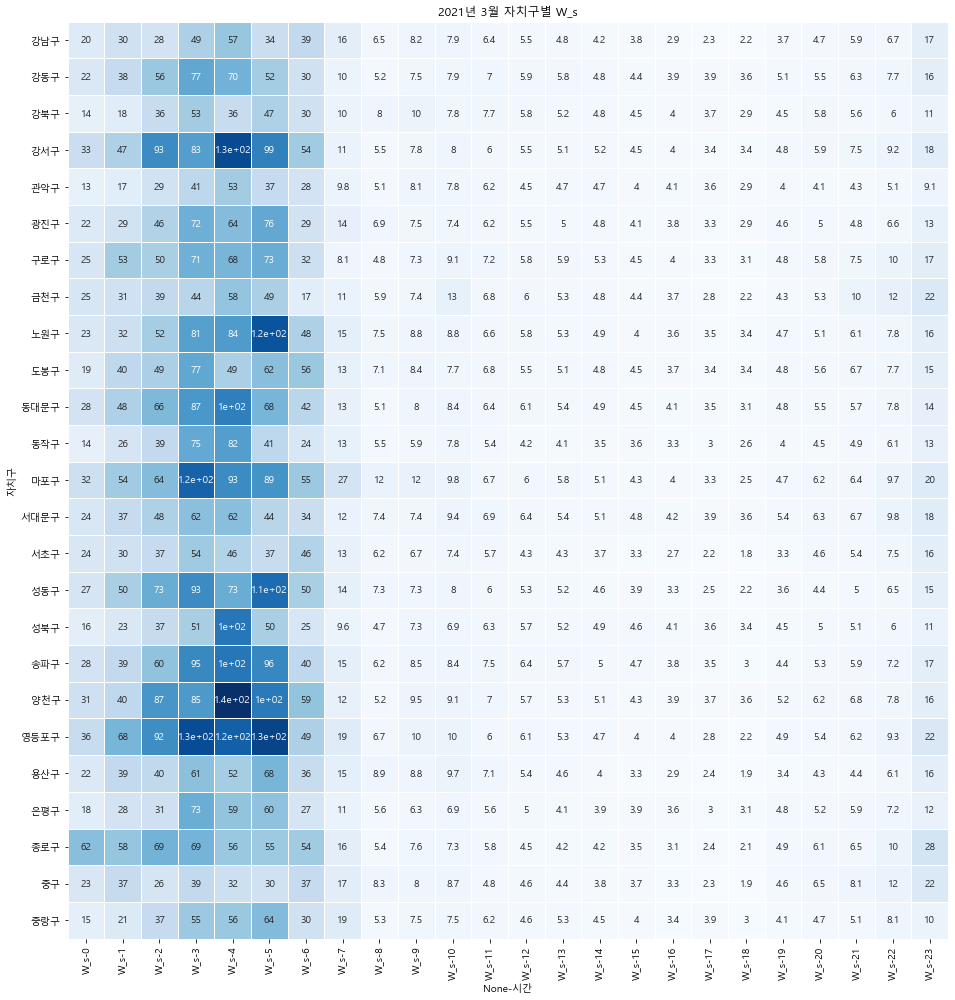

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                             \
시간          0          1           2           3           4           5    
자치구                                                                         
강남구  36.823918  61.679109   40.348974   78.822376  113.414722   75.409514   
강동구  32.369969  75.276563   80.838512  130.191038  147.109869  100.666825   
강북구  21.956601  18.396739   43.946815   58.428003   50.471664   77.768681   
강서구  56.982048  57.196971  150.367540  129.945279  305.277603  229.986865   
관악구  12.722792  17.772627   37.629479   51.744467   72.366023   56.799336   

                                                                      \
시간           6          7          8          9         10        11   
자치구                                                                    
강남구   93.664327  31.003407   9.456659  13.001617  8.183885  6.701099   
강동구   55.959622  16.660808   5.191431   6.193607  5.970354  5.006964   
강북구   45.270639  11.160791   9.773590  10.480246  5.490334  6.679386   
강서구  118.667100  18.123998  10.720500   9.709166  6.602977  4.545809   
관악구   48.360632  15.437158   6.660103   9.954182  8.894114  5.212199   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  5.164477  4.157205  3.372754  3.412039  2.369046  2.343811  2.346035   
강동구  4.244398  4.073787  2.930929  2.694080  2.243226  2.665738  2.800044   
강북구  3.821364  3.771886  2.985030  3.080306  2.774749  2.542742  1.891226   
강서구  3.481623  3.273848  3.517114  2.999446  2.644532  2.286875  3.501991   
관악구  3.305725  3.344731  3.803853  2.865711  4.213313  2.436552  2.116455   

                                                         
시간         19        20         21        22         23  
자치구                                                      
강남구  3.469534  4.270413   6.832689  7.088955  20.146691  
강동구  3.623096  3.897817   4.906832  6.465042  16.724349  
강북구  3.090554  8.021290   4.625028  4.327899  10.034769  
강서구  3.970111  5.963034  11.472718  8.609577  16.182295  
관악구  2.974982  2.882845   3.573516  4.991518   7.388172

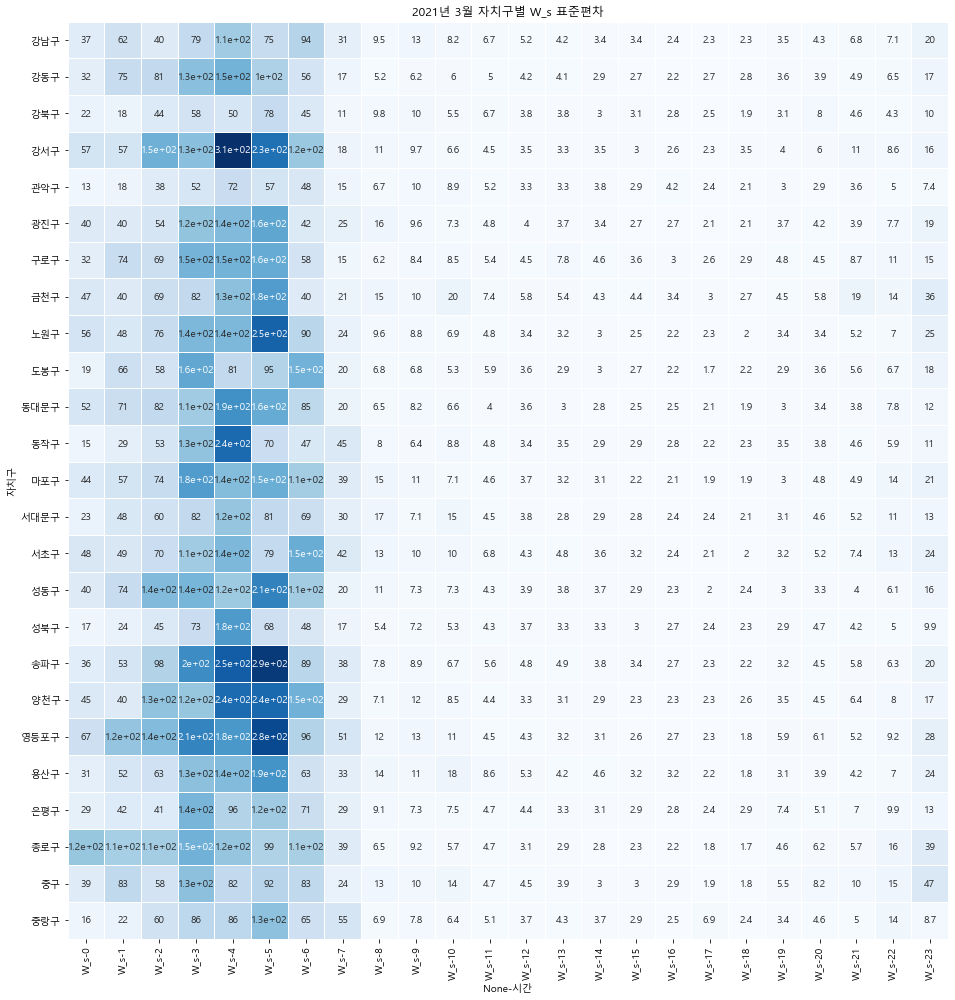

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2397,흑석한강푸르지오(110동)
2398,흥국사 정류장
2399,희성오피앙
2400,희훈타워빌 앞


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가락중학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 정문 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교 버스정류장',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '문정중학교',
 '문현중고등학교 사이',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',
 '서울과학기술대학

In [43]:
len(school)

142

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2160,강서구,KC 대학교,0,0.193548,0.032258,6.000000,0.857143,31.000000,학교
2161,강서구,KC 대학교,1,0.112903,0.040323,2.800000,0.736842,24.800000,학교
2162,강서구,KC 대학교,2,0.000000,0.000000,0.000000,0.000000,0.000000,학교
2163,강서구,KC 대학교,3,0.008065,0.000000,0.000000,0.000000,0.000000,학교
2164,강서구,KC 대학교,4,0.016129,0.008065,2.000000,0.666667,124.000000,학교
...,...,...,...,...,...,...,...,...,...
57475,동대문구,휘봉고등학교 앞,19,0.467742,0.370968,1.260870,0.557692,2.695652,학교
57476,동대문구,휘봉고등학교 앞,20,0.387097,0.177419,2.181818,0.685714,5.636364,학교
57477,동대문구,휘봉고등학교 앞,21,0.290323,0.153226,1.894737,0.654545,6.526316,학교
57478,동대문구,휘봉고등학교 앞,22,0.379032,0.112903,3.357143,0.770492,8.857143,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지??1번출구',
 '419민주묘지역 1번출구',
 '7호선 이?熾?번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 '?瀯轅?10번출구 앞',
 '당산역 10번출구 앞',
 '?閨망ㅇ琯?읏?6번출구',
 '압구정로데오역 6번출구',
 '?껼壙攷犬恝?1번출구',
 '남부터미널역 1번출구',
 '?쒼♧?5번출구',
 '종각역 5번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가?玔쳄恙?2번 출구',
 '가락시장역 2번 출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고덕역 5번출구',
 '고려대학교 2번출구',
 '고속터미널역 3번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕??2번출구',
 '공덕역 2번출구',
 '공덕??5번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉??1번 출구 앞',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '광흥창역5번출구',
 '교대역 5번출구뒤',
 '교대역 6번

In [46]:
len(subway)

462

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.088710,0.072581,1.222222,2.394502,37.861606,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.072581,0.080645,0.900000,1.790286,29.372027,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.064516,0.080645,0.800000,1.563065,27.589160,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.016129,0.048387,0.333333,0.479339,29.966667,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.072581,0.024194,3.000000,3.520661,146.733333,지하철
...,...,...,...,...,...,...,...,...,...
57595,동작구,흑석역 4번출구,19,0.467742,0.362903,1.288889,0.563107,2.755556,지하철
57596,동작구,흑석역 4번출구,20,0.177419,0.282258,0.628571,0.385965,3.542857,지하철
57597,동작구,흑석역 4번출구,21,0.217742,0.282258,0.771429,0.435484,3.542857,지하철
57598,동작구,흑석역 4번출구,22,0.233871,0.306452,0.763158,0.432836,3.263158,지하철


In [48]:
apart

['?溯풍さ勇?(엘스아파트136동)',
 '잠실나들목2(엘스아파트136동)',
 'DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강동리버스트4단지아파트 404동 앞',
 '강동리버스트4단지아파트 405동 앞',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '개포래미안포레스트아파트 107동 앞',
 '거여동 어울림아파트  102동앞',
 '건영아파트 앞',
 '건영아파트앞 사거리',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '그랜드아이파크아파트 앞',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길성그랑프리텔아파트',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '낙성대 교수아파트',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '답십리파크자이아파트 앞',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동성1,2차 아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트

In [49]:
len(apart)

214

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
600,송파구,?溯풍さ勇?(엘스아파트136동),0,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
601,송파구,?溯풍さ勇?(엘스아파트136동),1,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
602,송파구,?溯풍さ勇?(엘스아파트136동),2,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
603,송파구,?溯풍さ勇?(엘스아파트136동),3,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
604,송파구,?溯풍さ勇?(엘스아파트136동),4,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
...,...,...,...,...,...,...,...,...,...
57403,동대문구,휘경sk뷰아파트 앞,19,0.483871,0.274194,1.764706,1.359623,5.974969,아파트
57404,동대문구,휘경sk뷰아파트 앞,20,0.451613,0.306452,1.473684,1.252236,5.207167,아파트
57405,동대문구,휘경sk뷰아파트 앞,21,0.322581,0.395161,0.816327,0.865627,3.667966,아파트
57406,동대문구,휘경sk뷰아파트 앞,22,0.338710,0.258065,1.312500,1.179090,6.074324,아파트


In [51]:
park

['뒷벌공원 옆',
 '올림픽공원 북2문 2',
 '가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '국립중앙박물관 -용산가족공원 앞',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '낙성대공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '등나무 근린공원(시립북서울?抉解?앞)',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정근린공원2',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '서래공원 앞',
 '서소문역사공원',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 

In [52]:
len(park)

119

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
888,서초구,뒷벌공원 옆,0,0.137097,0.016129,8.500000,5.866669,363.734320,공원
889,서초구,뒷벌공원 옆,1,0.145161,0.056452,2.571429,5.373065,95.381908,공원
890,서초구,뒷벌공원 옆,2,0.088710,0.048387,1.833333,4.902022,102.554007,공원
891,서초구,뒷벌공원 옆,3,0.024194,0.016129,1.500000,4.435163,283.801504,공원
892,서초구,뒷벌공원 옆,4,0.000000,0.048387,0.000000,0.000000,0.000000,공원
...,...,...,...,...,...,...,...,...,...
57307,중구,훈련원공원주차장 앞,19,0.427419,0.330645,1.292683,1.815055,6.560789,공원
57308,중구,훈련원공원주차장 앞,20,0.193548,0.419355,0.461538,0.667009,3.648546,공원
57309,중구,훈련원공원주차장 앞,21,0.225806,0.362903,0.622222,0.941767,4.670697,공원
57310,중구,훈련원공원주차장 앞,22,0.209677,0.443548,0.472727,0.686294,3.476948,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.193548,0.032258,6.000000,0.857143,31.000000,학교
1,강서구,KC 대학교,1,0.112903,0.040323,2.800000,0.736842,24.800000,학교
2,강서구,KC 대학교,2,0.000000,0.000000,0.000000,0.000000,0.000000,학교
3,강서구,KC 대학교,3,0.008065,0.000000,0.000000,0.000000,0.000000,학교
4,강서구,KC 대학교,4,0.016129,0.008065,2.000000,0.666667,124.000000,학교
...,...,...,...,...,...,...,...,...,...
22507,중구,훈련원공원주차장 앞,19,0.427419,0.330645,1.292683,1.815055,6.560789,공원
22508,중구,훈련원공원주차장 앞,20,0.193548,0.419355,0.461538,0.667009,3.648546,공원
22509,중구,훈련원공원주차장 앞,21,0.225806,0.362903,0.622222,0.941767,4.670697,공원
22510,중구,훈련원공원주차장 앞,22,0.209677,0.443548,0.472727,0.686294,3.476948,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.115072  0.079154  0.047506  0.030496  0.022770  0.036324  0.063567   
아파트  0.140698  0.088260  0.052701  0.030720  0.023631  0.025394  0.033533   
지하철  0.165742  0.121404  0.081570  0.049906  0.037792  0.063416  0.144899   
학교   0.123921  0.081497  0.047933  0.031179  0.021184  0.018571  0.036858   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.151193  0.359989  0.209474  0.180062  0.218284  0.288290  0.312686   
아파트  0.121380  0.256002  0.158815  0.142161  0.180833  0.247824  0.254089   
지하철  0.360931  0.625454  0.392351  0.313731  0.370566  0.450356  0.485512   
학교   0.137494  0.279816  0.176284  0.154305  0.171399  0.235632  0.237506   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.335525  0.402277  0.484752  0.577392  0.754744  0.563161  0.420033   
아파트  0.276669  0.315191  0.411103  0.517517  0.747262  0.576144  0.408927   
지하철  0.506546  0.592655  0.725754  0.948820  1.196045  0.821132  0.574466   
학교   0.246138  0.289414  0.353532  0.435030  0.577806  0.452919  0.334677   

                                   
시간         21        22        23  
특성                                 
공원   0.413391  0.408376  0.209000  
아파트  0.413841  0.429107  0.230720  
지하철  0.517508  0.471059  0.265605  
학교   0.324057  0.321445  0.193378

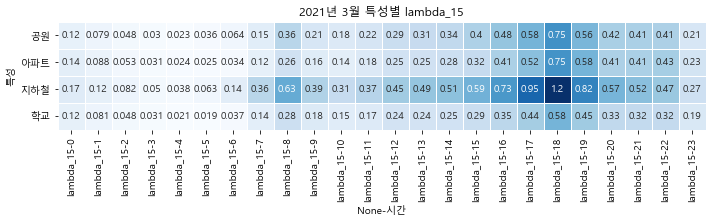

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.128685  0.090365  0.060748  0.035946  0.034816  0.079085  0.098754   
아파트  0.128098  0.081752  0.053065  0.034264  0.030565  0.046022  0.054207   
지하철  0.187195  0.135736  0.089731  0.057792  0.051037  0.091661  0.203793   
학교   0.124822  0.091702  0.063076  0.040684  0.035701  0.029821  0.058014   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.301305  0.491344  0.274480  0.187700  0.198979  0.260465  0.282743   
아파트  0.218978  0.500111  0.177056  0.145890  0.165476  0.238007  0.239120   
지하철  0.495203  0.750338  0.408758  0.296244  0.335075  0.417871  0.464254   
학교   0.155190  0.319613  0.231871  0.177217  0.160922  0.218880  0.235753   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.327714  0.415844  0.489134  0.524582  0.669218  0.551789  0.390847   
아파트  0.278336  0.328548  0.405908  0.477524  0.646320  0.472927  0.344814   
지하철  0.529130  0.687161  0.913870  1.140608  1.290472  0.901164  0.711210   
학교   0.276665  0.379105  0.458692  0.549773  0.604083  0.454020  0.331401   

                                   
시간         21        22        23  
특성                                 
공원   0.414847  0.407442  0.216792  
아파트  0.343225  0.356443  0.188264  
지하철  0.656645  0.576715  0.345006  
학교   0.312762  0.292112  0.196262

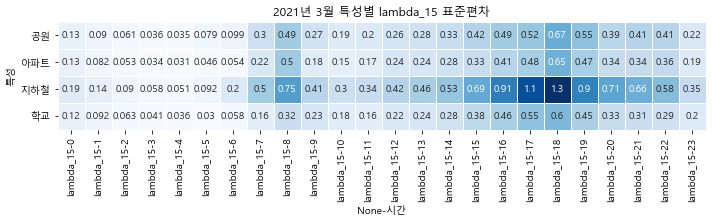

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.095012  0.060247  0.039374  0.022160  0.020331  0.053131  0.100908   
아파트  0.098875  0.065004  0.040023  0.030045  0.025881  0.054089  0.131883   
지하철  0.161098  0.107789  0.072912  0.046450  0.033829  0.039205  0.091084   
학교   0.081667  0.056508  0.036745  0.022319  0.020388  0.040266  0.093367   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.302453  0.417390  0.246612  0.221537  0.286866  0.321903  0.353212   
아파트  0.371305  0.491073  0.265304  0.224794  0.244299  0.282146  0.300375   
지하철  0.281787  0.627182  0.369083  0.297392  0.371701  0.444491  0.498254   
학교   0.255679  0.399818  0.229498  0.187869  0.213539  0.269764  0.275727   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.380320  0.458322  0.512944  0.596774  0.693616  0.427487  0.363988   
아파트  0.319167  0.365266  0.414891  0.467929  0.555889  0.399287  0.332408   
지하철  0.544983  0.629277  0.732736  0.916108  1.188923  0.793185  0.614614   
학교   0.291913  0.348137  0.437812  0.457746  0.480407  0.325477  0.267833   

                                   
시간         21        22        23  
특성                                 
공원   0.316481  0.266129  0.143603  
아파트  0.314254  0.259715  0.133308  
지하철  0.580296  0.493611  0.232771  
학교   0.255679  0.225750  0.131361

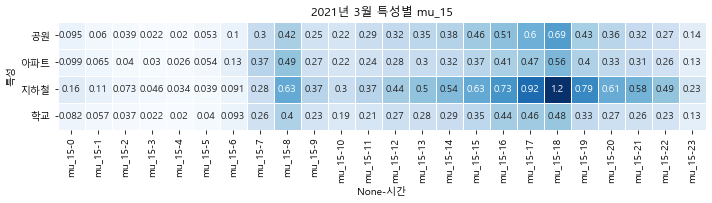

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.096593  0.059650  0.041603  0.029439  0.035478  0.072035  0.134022   
아파트  0.088310  0.071646  0.038541  0.036935  0.041997  0.077940  0.138943   
지하철  0.186125  0.127841  0.079356  0.061686  0.044303  0.055497  0.108242   
학교   0.082410  0.063656  0.044062  0.026069  0.032538  0.063728  0.123249   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.313702  0.439993  0.233646  0.187052  0.240516  0.273518  0.322530   
아파트  0.334818  0.448605  0.213147  0.175674  0.213507  0.235662  0.230358   
지하철  0.332253  0.724744  0.343292  0.249409  0.313936  0.378142  0.469100   
학교   0.276833  0.384431  0.201050  0.152614  0.174157  0.218127  0.224267   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.350430  0.445670  0.456916  0.541422  0.637607  0.397039  0.319685   
아파트  0.271532  0.348393  0.379217  0.444436  0.515180  0.331172  0.282626   
지하철  0.572982  0.742875  0.872853  0.983453  1.227773  0.859941  0.693686   
학교   0.261851  0.368400  0.419010  0.450269  0.519120  0.334565  0.266855   

                                   
시간         21        22        23  
특성                                 
공원   0.288592  0.237544  0.125807  
아파트  0.286045  0.241911  0.114030  
지하철  0.648126  0.537860  0.273845  
학교   0.274820  0.247852  0.131393

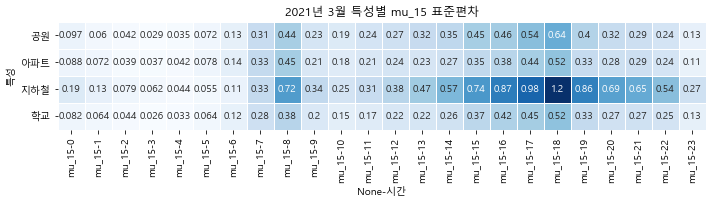

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.579823  1.269189  0.885967  1.194344  1.032799  1.918970  1.817630   
아파트  1.820730  1.702080  1.617850  1.158601  1.213315  1.028579  0.441765   
지하철  1.138895  1.235753  1.192660  1.165108  1.172663  1.979890  2.389006   
학교   2.010629  1.743362  1.401927  1.193701  0.882993  0.782556  0.697037   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.166184  1.549875  1.165035  0.878606  0.830684  0.878671  0.961924   
아파트  0.597214  0.679611  0.640613  0.606220  0.754662  0.842674  0.779813   
지하철  1.694634  1.168677  1.080925  1.090306  0.952089  0.955000  0.925159   
학교   1.387800  1.714983  1.356301  0.996239  0.887474  0.892734  0.918509   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.871814  0.855503  0.895494  0.983707  1.204063  1.326656  1.230216   
아파트  0.801142  0.839478  0.937245  1.096910  1.502262  1.483669  1.378321   
지하철  0.875134  0.878003  0.908047  0.952124  0.970388  1.023352  0.892706   
학교   0.834209  0.808914  0.754529  0.957190  1.371788  1.597830  1.388202   

                                   
시간         21        22        23  
특성                                 
공원   1.512931  1.955896  1.449576  
아파트  1.573199  1.961536  1.869182  
지하철  0.890107  0.956671  1.162356  
학교   1.634279  1.990002  1.777033

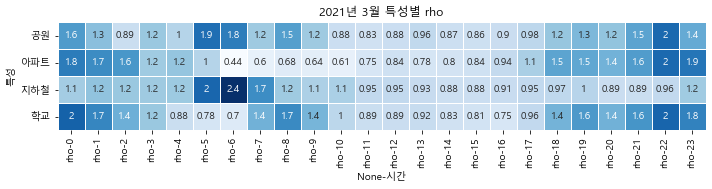

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.883482  2.011588  1.643396  1.641338  1.162731  0.894248  1.180214   
아파트  1.932780  1.847874  1.713914  1.366925  1.074074  0.741677  0.567740   
지하철  2.229144  2.409088  2.457689  2.263369  2.184011  2.835762  2.627113   
학교   1.436328  1.420562  1.144405  1.198807  0.823905  0.486705  0.472427   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.954213  1.383819  1.232457  1.183760  1.122137  1.384558  1.304924   
아파트  0.596645  0.723402  0.791582  0.867953  1.059006  1.243503  1.206267   
지하철  2.736860  2.407667  2.504701  2.620063  2.383574  2.475946  2.193214   
학교   0.836353  0.962282  0.918077  0.912840  0.910302  1.046253  1.041472   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.372951  1.374512  1.654305  1.733672  1.878727  2.077805  1.878856   
아파트  1.285832  1.256164  1.449315  1.632232  1.824936  1.925709  1.746885   
지하철  2.092400  2.105578  2.454059  2.605718  2.460556  2.461268  2.172675   
학교   1.056250  1.046606  1.046722  1.197741  1.346698  1.453849  1.393116   

                                   
시간         21        22        23  
특성                                 
공원   1.994634  2.190817  2.008597  
아파트  1.810346  2.019223  2.064336  
지하철  2.029472  2.200072  2.614247  
학교   1.345848  1.390583  1.477646

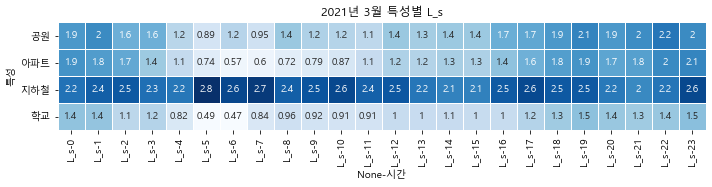

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.597326  2.713384  2.586638  2.691387  1.992316  1.887226  2.081362   
아파트  2.441531  2.324278  2.419518  2.221640  1.862556  1.512149  1.369562   
지하철  3.138779  3.098167  4.279125  4.222072  4.433847  5.483087  3.806127   
학교   1.970677  2.082663  1.500210  2.254251  1.715574  1.329206  1.150983   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.834146  2.235971  1.813969  1.532270  1.341637  1.512177  1.331005   
아파트  1.257266  1.345600  1.104619  1.160747  1.372528  1.560407  1.461563   
지하철  4.587793  4.247111  4.257063  4.513622  3.435091  4.141681  2.460018   
학교   1.888413  1.818976  1.670739  1.364949  1.133310  1.340477  1.461879   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.506518  1.473684  2.051971  2.161398  2.422757  2.465228  2.375440   
아파트  1.674486  1.446636  1.687014  2.036459  2.151598  2.271581  2.187730   
지하철  2.644499  2.178934  3.936235  4.651930  4.489349  4.311272  4.200220   
학교   1.558060  1.486703  1.566769  1.898948  1.774428  1.932704  1.929679   

                                   
시간         21        22        23  
특성                                 
공원   2.536019  2.768614  2.622806  
아파트  2.173209  2.426382  2.416670  
지하철  4.285363  4.552267  4.792405  
학교   1.738573  1.635223  1.811963

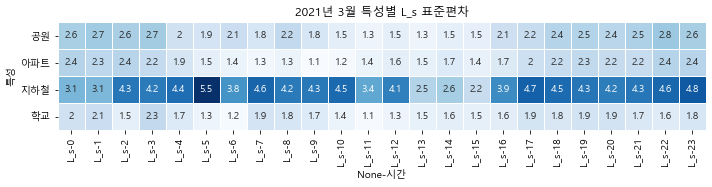

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                           \
시간          0          1          2          3           4           5    
특성                                                                        
공원   28.917786  39.973707  51.087752  91.198426   87.056175   52.333875   
아파트  28.839804  43.479242  71.279798  74.902408   81.937931   42.822128   
지하철  25.489843  38.161300  53.185774  88.788827  110.181711  116.591381   
학교   29.547336  39.857335  49.019713  68.260441   63.633224   40.503760   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   42.229126  10.706168  7.043917  8.574460  7.698067  5.856915  5.559133   
아파트  22.458300   6.483747  3.444175  5.968584  6.286945  6.173342  5.682026   
지하철  61.161140  19.027697  6.508394  8.187103  9.905945  7.135039  5.801814   
학교   22.157056  12.560490  7.475321  8.287848  8.298876  6.576407  5.269906   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   4.766704  4.420536  3.785036  3.670189  3.229805  2.993122  5.032439   
아파트  4.953234  4.897896  4.323011  3.951424  3.774577  3.553427  4.697436   
지하철  5.142297  4.730437  4.144578  3.710770  3.012754  2.350377  3.642547   
학교   5.051344  4.910943  4.342630  3.376398  3.330257  3.664692  5.340748   

                                              
시간         20        21        22         23  
특성                                            
공원   5.519346  7.373693  9.439559  15.041255  
아파트  5.772323  6.420434  8.855661  17.045413  
지하철  4.530505  4.874647  6.019859  15.186336  
학교   6.127692  7.420260  9.802878  17.225017

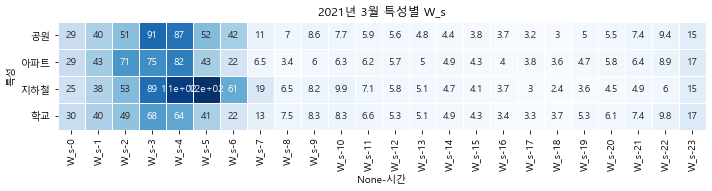

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                             \
시간          0          1           2           3           4           5    
특성                                                                          
공원   45.857401  52.718753   78.052421  166.315891  148.595505  148.704251   
아파트  50.830034  61.720327  112.073852  129.048050  155.069215   93.971075   
지하철  52.100706  54.414157   80.329269  162.508387  237.330328  247.493455   
학교   61.668064  52.024318   67.670919  112.098252  140.913905  101.612483   

                                                                       \
시간           6          7          8          9          10        11   
특성                                                                      
공원   105.401095  19.399545  10.644154  10.682448   6.659494  5.096682   
아파트   61.361536  26.118444   5.072149   9.768176   5.795580  5.218074   
지하철  105.382731  35.344424   8.233833   7.350684  10.519515  5.010117   
학교    50.723527  29.512247  15.131904  11.475340   7.689666  5.475316   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   4.522235  3.590089  3.143578  2.721312  3.002518  2.540176  2.484575   
아파트  4.605514  3.642419  3.679639  3.171215  2.748992  2.738495  2.832494   
지하철  3.681805  3.132219  3.121502  2.396936  2.177969  1.837146  1.575684   
학교   3.972540  3.785574  3.570280  3.381780  2.512590  2.325782  3.069954   

                                                         
시간         19        20        21         22         23  
특성                                                       
공원   4.319073  4.616306  8.538758  10.888263  13.019680  
아파트  3.658005  5.892579  5.873181   8.904423  18.210660  
지하철  2.437437  3.705730  4.567477   5.917315  21.938779  
학교   4.468836  4.742195  7.265674  10.729046  23.337469

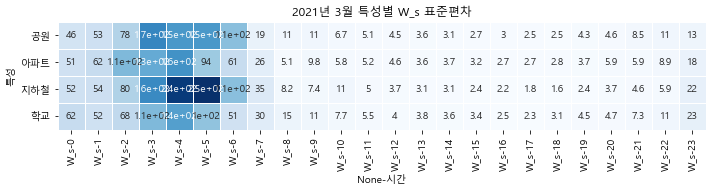

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()